# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           5.02e-23
Time:                        13:04:41   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

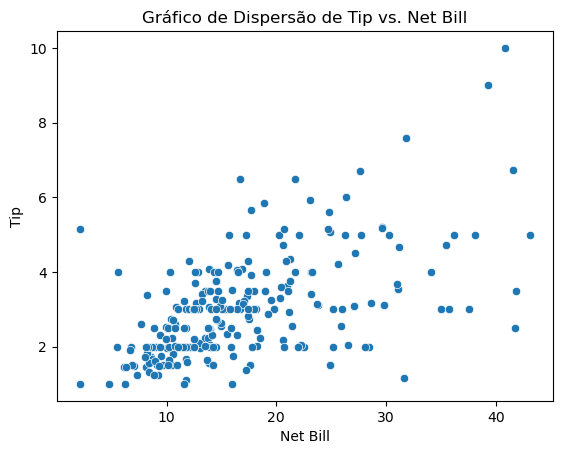

In [3]:
# Reproduza a regressão
model = smf.ols(formula='tip ~ net_bill', data=tips).fit()
print(model.summary())

# Reproduza o gráfico de dispersão
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.title("Gráfico de Dispersão de Tip vs. Net Bill")
plt.xlabel("Net Bill")
plt.ylabel("Tip")
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        13:09:07   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

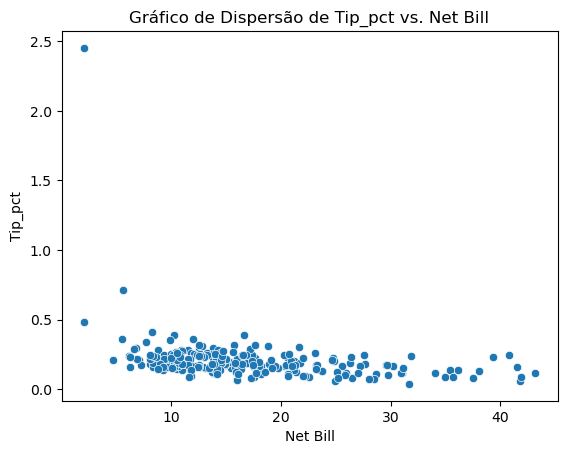

In [5]:
# Ajuste um modelo de regressão de tip_pct por net_bill
model_tip_pct = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Exiba o resumo das estatísticas da regressão
print(model_tip_pct.summary())

# Crie o gráfico de dispersão
sns.scatterplot(x='net_bill', y='tip_pct', data=tips)
plt.title("Gráfico de Dispersão de Tip_pct vs. Net Bill")
plt.xlabel("Net Bill")
plt.ylabel("Tip_pct")
plt.show()


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

1. **Gráficos:**
   - O primeiro gráfico representa um modelo de regressão com uma explicação de **38,0%** da variância.
   - O segundo gráfico, "Global Distribution of Tips for All Bills", parece mais disperso e não segue uma linha de regressão clara.
   - A diferença no ajuste é evidente: o segundo gráfico não se ajusta tão bem quanto o primeiro.

2. **Coeficiente de Determinação \(R^2\):**
   - O \(R^2\) é uma medida estatística que indica quão próximos os dados estão da linha de regressão ajustada.
   - No entanto, não podemos comparar diretamente os valores de \(R^2\) entre diferentes modelos, pois cada modelo tem seu próprio contexto e interpretação.

Em resumo, o primeiro gráfico tem um ajuste melhor e explica mais variação nos dados do que o segundo gráfico. Lembre-se sempre de considerar o contexto específico ao interpretar os resultados.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [6]:
# Obtenha o valor predito (fitted values) para tip_pct
pred_tip_pct = model_tip_pct.fittedvalues

# Obtenha o valor predito para tip usando tip_pct * net_bill
tips['pred_tip'] = pred_tip_pct * tips['net_bill']

# Calcule o R^2 do modelo para tip
from sklearn.metrics import r2_score

# R^2 do modelo no item 3 (tip_pct por net_bill)
r2_tip_pct = r2_score(tips['tip'], tips['pred_tip'])

# R^2 do modelo no item 1 (tip por net_bill)
r2_tip = model.rsquared

# Exiba os resultados
print("Valor predito para tip_pct:")
print(pred_tip_pct.head())

print("\nValor predito para tip:")
print(tips['pred_tip'].head())

print(f"\nR^2 do modelo para tip no item 3: {r2_tip_pct}")
print(f"R^2 do modelo para tip no item 1: {r2_tip}")


Valor predito para tip_pct:
0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

Valor predito para tip:
0    3.309254
1    2.186938
2    3.461450
3    3.668785
4    3.699998
Name: pred_tip, dtype: float64

R^2 do modelo para tip no item 3: 0.1088997484546137
R^2 do modelo para tip no item 1: 0.3325407312323705
